In [2]:
!pip install yfinance

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download Historical Stock Data
stock_symbol = 'NVDA'  # You can change this to any stock symbol you like
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [21]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741249,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031540,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746216,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858276,27710800


In [22]:

# Step 2: Monte Carlo Simulation
def monte_carlo_simulation(stock_data, num_simulations=1000, num_days=252):
    returns = stock_data['Adj Close'].pct_change().dropna()
    mean_return = returns.mean()
    std_return = returns.std()

    # Starting price for the simulation
    last_price = stock_data['Adj Close'][-1]

    # Simulation
    simulation_data = np.zeros((num_days, num_simulations))
    
    for i in range(num_simulations):
        price_series = [last_price]
        for _ in range(num_days):
            price = price_series[-1] * np.exp((mean_return - 0.5 * std_return**2) + std_return * np.random.normal())
            price_series.append(price)
        simulation_data[:, i] = price_series[1:]
    
    return simulation_data

num_simulations = 1000
num_days = 252  # Number of trading days in a year
simulated_data = monte_carlo_simulation(stock_data, num_simulations, num_days)



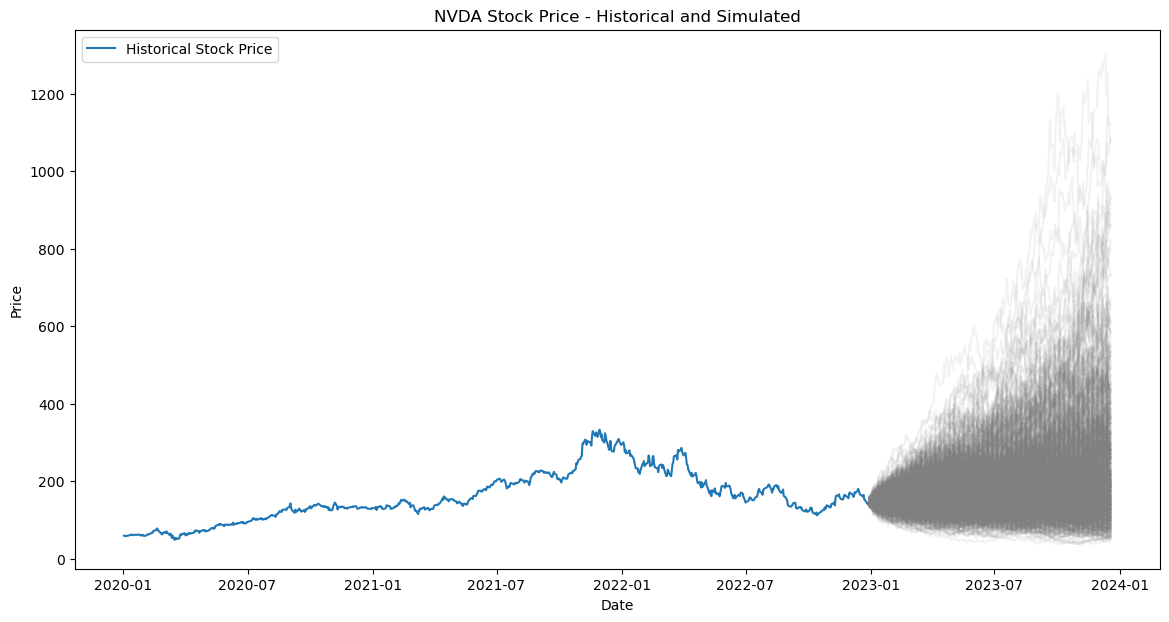

In [23]:
# Step 3: Plot Historical Data and Simulations
plt.figure(figsize=(14, 7))

# Plot historical stock prices
plt.plot(stock_data['Adj Close'], label='Historical Stock Price')

# Plot simulated price paths
for i in range(num_simulations):
    plt.plot(pd.date_range(start=stock_data.index[-1], periods=num_days, freq='B'), simulated_data[:, i], color='grey', alpha=0.1)

plt.title(f'{stock_symbol} Stock Price - Historical and Simulated')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()